In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv("housing.csv", delim_whitespace=True, header=None)
X = data.iloc[:,0:13]
Y = data.iloc[:,13]

In [2]:
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33


In [3]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_scaled = pd.DataFrame(scaler.transform(X))


In [4]:
def sigmoid(x):
    """
    Calculate sigmoid
    """
    return 1 / (1 + np.exp(-x))

In [5]:
def relu(x):
    return np.maximum(x, 0)

def derv_relu(x):
    return np.greater(x, 0).astype(int)

In [6]:
n_hidden =20
epochs = 5000
learning_rate = 0.005

n_records, n_features = X.shape


In [7]:
weights_input_hidden = np.random.normal(scale=1 / n_features ** .5,
                                        size=(n_features, n_hidden))

weights_hidden_output = np.random.normal(scale=1 / n_features ** .5,
                                         size=n_hidden)

weights_hidden_output = weights_hidden_output[:,None]

In [8]:
last_loss = None
for e in range(epochs):
    del_w_input_hidden = np.zeros(weights_input_hidden.shape)
    del_w_hidden_output = np.zeros(weights_hidden_output.shape)
    for x, y in zip(X_scaled.values,Y):
        #print(x,y)
        hidden_input = np.dot(x[None,:],weights_input_hidden)
        hidden_output = sigmoid(hidden_input)
        output = np.dot(hidden_output, weights_hidden_output)
        
        error = y - output
        
        output_error_term = error * 1 # derivative of y=x is 1
        
        hidden_error =  weights_hidden_output.T *output_error_term 
        
        hidden_error_term = hidden_error * hidden_output * (1-hidden_output)
        
        del_w_hidden_output += learning_rate*np.dot(hidden_output.T, output_error_term)
        del_w_input_hidden +=  learning_rate*np.dot(x[:,None], hidden_error_term)
        
    # TODO: Update weights
    weights_input_hidden += del_w_input_hidden / n_records
    weights_hidden_output += del_w_hidden_output / n_records
        
    # Printing out the mean square error on the training set
    if e % (epochs / 10) == 0:
        hidden_output = sigmoid(np.dot(x, weights_input_hidden))
        out = np.dot(hidden_output, weights_hidden_output)
        loss = np.mean((out - Y) ** 2)

        if last_loss and last_loss < loss:
            print("Train loss: ", loss, "  WARNING - Loss Increasing")
        else:
            print("Train loss: ", loss)
        last_loss = loss     
        

Train loss:  546.6381855438568
Train loss:  84.56696538462256
Train loss:  84.42213311442735
Train loss:  84.47410026892011   WARNING - Loss Increasing
Train loss:  84.67726815661445   WARNING - Loss Increasing
Train loss:  84.98592854659223   WARNING - Loss Increasing
Train loss:  85.33845859537306   WARNING - Loss Increasing
Train loss:  85.70354241184643   WARNING - Loss Increasing
Train loss:  86.07365606925579   WARNING - Loss Increasing
Train loss:  86.44430336671807   WARNING - Loss Increasing


In [11]:
hidden = sigmoid(np.dot(X_scaled.values, weights_input_hidden))
out = np.dot(hidden, weights_hidden_output)



__Predicting with test data__

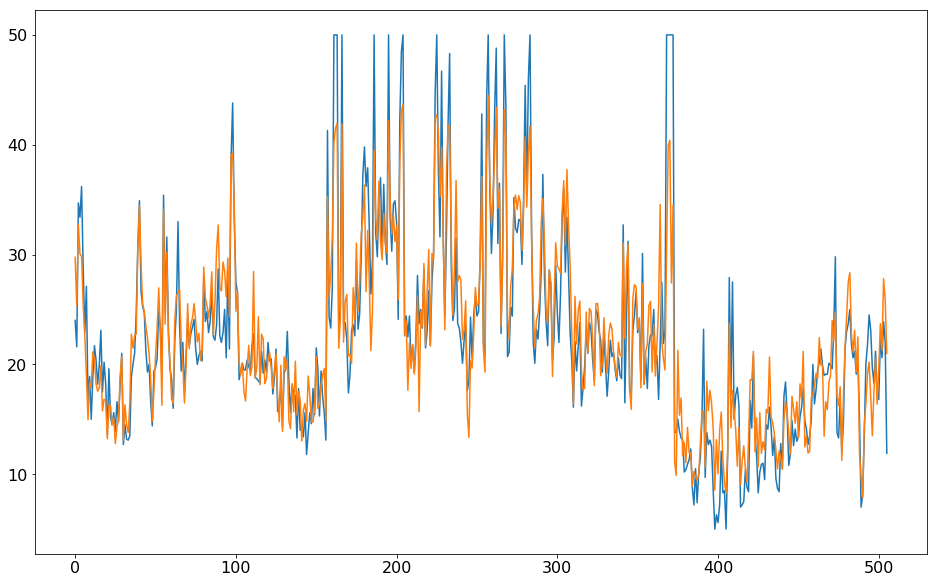

In [12]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (16.0,10.0)
matplotlib.rcParams['font.size']=16

plt.plot(Y)
plt.plot(out)
plt.show()